# Code for solving Riddler Classic Week of May 22, 2015
[Problem](https://fivethirtyeight.com/features/somethings-fishy-in-the-state-of-the-riddler/)

In [22]:
import string
import itertools
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def read_word_list():
    with open("word.list", "r") as f:
        return [word.replace("\n", "") for word in f]

In [3]:
def read_states_list():
    with open("states.list", "r") as f:
        return [state.lower().replace("\n", "").replace(" ", "") for state in f]

In [4]:
words = read_word_list()

In [5]:
include_dc = False
states = read_states_list()
if include_dc:
    states.append("washingtondc")

In [6]:
# gets unique letters in ascending order
word_sets = ["".join(sorted(list(set(word)))) for word in words]

In [7]:
letter_states = {c : set() for c in string.ascii_lowercase}
for state in states: 
    for letter in state:
        letter_states[letter].add(state)

In [8]:
state_set = set(states)

In [9]:
state_mackerels = {state : [] for state in states}
explored_words = set()
total = len(word_sets)
for i, word in enumerate(word_sets):
    if word in explored_words:
        continue
    # create a set to keep track of which states have a letter in common
    cur_set = set()
    for letter in word:
        cur_set = cur_set.union(letter_states[letter])
    if len(cur_set) == (50 if include_dc else 49):
        # We've got a mackerel!
        state = state_set.difference(cur_set).pop()
        state_mackerels[state].append(words[i])
    else: 
        # probably not the most efficient to have this else case
        # but we need to make sure that if it is a mackerel, we get all other mackerels with the same letters
        explored_words.add(word)

In [10]:
# concatenate all mackerels into a single list with the state and the length
all_mackerels = list(itertools.chain(*[[(key, value, len(value)) for value in l] for key, l in state_mackerels.items()]))

In [11]:
sorted_mackerels = sorted(all_mackerels, key = lambda w: w[2], reverse = True)

In [12]:
len(sorted_mackerels)

45385

In [13]:
sorted_mackerels[:10]

[('alabama', 'counterproductivenesses', 23),
 ('mississippi', 'hydrochlorofluorocarbon', 23),
 ('alabama', 'counterproductiveness', 21),
 ('alabama', 'unconscientiousnesses', 21),
 ('alabama', 'counterconditionings', 20),
 ('alabama', 'deoxycorticosterones', 20),
 ('alabama', 'hyperconsciousnesses', 20),
 ('alabama', 'hypersensitivenesses', 20),
 ('alabama', 'interconnectednesses', 20),
 ('alabama', 'nondestructivenesses', 20)]

In [14]:
sorted_states = sorted([(key, len(value)) for key, value in state_mackerels.items()], key = lambda x: x[1], reverse = True)

In [15]:
sorted_states[:10]

[('ohio', 11342),
 ('alabama', 8274),
 ('utah', 6619),
 ('mississippi', 4863),
 ('hawaii', 1763),
 ('kentucky', 1580),
 ('wyoming', 1364),
 ('tennessee', 1339),
 ('alaska', 1261),
 ('nevada', 1229)]

In [16]:
def avg_len(l):
    if l == []:
        return 0
    return sum([len(x) for x in l]) / len(l)

In [17]:
avg_mackerel_lengths = sorted([(key, avg_len(value), len(value)) for key, value in state_mackerels.items()], key = lambda x: x[1], reverse = True)

In [18]:
# Average length of a mackerel for each state. 
avg_mackerel_lengths[:25]

[('michigan', 11.25, 4),
 ('alabama', 10.649504471839498, 8274),
 ('hawaii', 10.482132728304027, 1763),
 ('indiana', 10.421161825726141, 482),
 ('alaska', 10.293417922283902, 1261),
 ('oklahoma', 10.13279132791328, 369),
 ('iowa', 10.064676616915422, 201),
 ('kansas', 9.915158371040723, 884),
 ('nevada', 9.804719283970709, 1229),
 ('delaware', 9.779448621553884, 399),
 ('utah', 9.511557637105303, 6619),
 ('maine', 9.428571428571429, 14),
 ('wisconsin', 9.266666666666667, 60),
 ('maryland', 9.253731343283581, 67),
 ('montana', 9.175925925925926, 648),
 ('virginia', 9.149532710280374, 107),
 ('oregon', 9.049853372434018, 682),
 ('northdakota', 8.925925925925926, 54),
 ('tennessee', 8.888722927557879, 1339),
 ('colorado', 8.862785862785863, 481),
 ('newyork', 8.761904761904763, 105),
 ('texas', 8.744913928012519, 639),
 ('ohio', 8.726415094339623, 11342),
 ('mississippi', 8.646720131606005, 4863),
 ('newmexico', 8.633333333333333, 30)]

In [19]:
# Number of states with no mackerels at all
len([x for x in sorted_states if x[1] == 0])

18

In [20]:
# average length of all mackerels
avg_len([x[1] for x in all_mackerels])

9.366486724688773

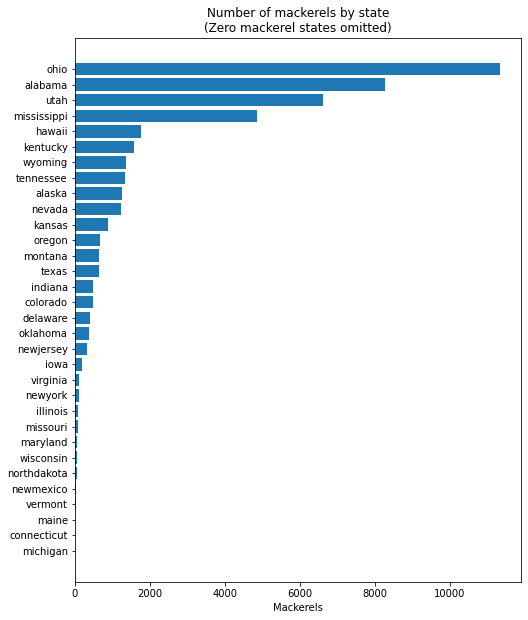

In [28]:
plt.figure(num=None, figsize=(8, 10))
plt.barh([state[0] for state in reversed(sorted_states) if state[1] > 0], 
         [state[1] for state in reversed(sorted_states) if state[1] > 0])
plt.title("Number of mackerels by state\n(Zero mackerel states omitted)")
plt.xlabel("Mackerels")
plt.show()

In [25]:
counts = sorted(Counter([x[2] for x in all_mackerels]).items(), key = lambda x: x[0])

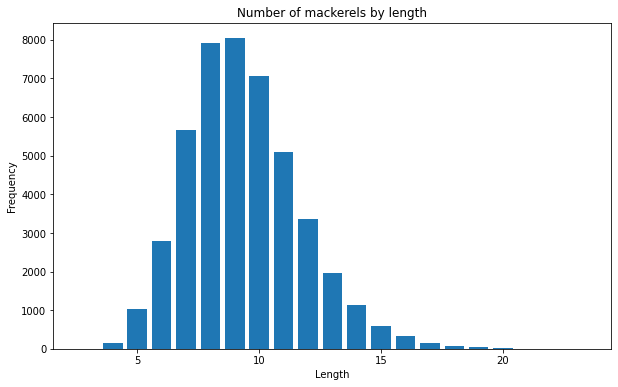

In [33]:
plt.figure(num=None, figsize=(10, 6))
plt.bar([x[0] for x in counts], [x[1] for x in counts])
plt.title("Number of mackerels by length")
plt.ylabel("Frequency")
plt.xlabel("Length")
plt.show()